<h1> Utrecht Summer School 'Introduction to Complex Systems' </h1>
<h2> Day 2. Project Cellular Automata </h2>

This Jupyter notebook contains the parameters that can be changed. It calls the function that will perform the simulation, computation and visualisation. Only this notebook needs to be amended.

<h3> Dependencies </h3>

The codes used in this project depend on complementary Python files. Specificially, the following packages need to be installed.
<h4> Packages needed </h4>
<ul>
    <li> numpy </li>
    <li> matplotlib </li>
    <li> IPython </li>
</ul>

<h1> Import the python codes </h1>

In [8]:
## DO NOT CHANGE THIS
%matplotlib inline

from CA_functions import CA_simulator

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib import animation
from matplotlib.animation import PillowWriter

from PIL import Image
from typing import Callable

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

C:\Users\guilh\AppData\Local\Temp\ipykernel_4832\411032274.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1> Parameters </h1>

In [9]:
# Parameters are packed into a class for easy passing of all parameter values to the simulator function

class Parameters:
    ## GENERAL PARAMETERS
    
    # domain size
    M = 50 # x-direction
    N = 50 # y-direction
    
    # initial conditions
    p = 0.2 # fraction of initial cells that are in the 1-state
    
    # scale-dependent activator-inhibitor parameters
    R_a = 5 #5 # activator radius
    R_i = 10 #10 # inhibitor radius
    w_a = 0.3 #0.3 # activator strength
    w_i = 0.1 #0.1 # inhibitor strength
    
    # Number of timesteps
    timesteps = 80
    
# Finally, we create one instance of this class that now contains all parameters
par = Parameters

In [10]:
## Declaration of the CA evolution rule
def CA_evolution(i, j, A, N_a, N_i, w_a, w_i):
    # Input:
    # i: x-coordinate of the cell under consideration
    # j: y-coordinate of the cell under consideration
    # A: current state of the lattice
    # N_a: list of cells within activator range
    # N_i: list of cells within inhibitor range
    # w_a: strength of activator
    # w_i: strength of inhibitor
    
    # The total impact on the current strength is the amount of cells within activator range that are 
    # currently in the 1 state times the activator strength w_a, minus the amount of cells within inhibitor 
    # range that are currently in the 1 state times the inhibitor strength w_i.
    s = np.sum( A[N_a] * w_a ) - np.sum( A[N_i] * w_i)
    
    # If the total impact on the current cell is positive, it will be in the 1 state in the next time step;
    # otherwise, it will be in the 0 state
    Anext = int(s > 0)
    return Anext

# Making Videos

In [11]:
# Make into video
def makeVideo(arrList, dt, frames, name="makeVideo", interval=200):
    fig, ax = plt.subplots()
    plt.title(f"Time Step: 0")
    plt.xlabel('Position')
    plt.ylabel('Position')

    # First frame
    im = ax.imshow(arrList[0], cmap="Greys")
    plt.colorbar(im)

    # Update the frame
    def update(frameIndex):
        # Timestep
        tempo = int(dt * frameIndex)
        plt.title(f"Time Step: {tempo}")

        # Atualizar os dados na imagem
        im.set_array(arrList[tempo])
        return im

    # Guardar o vídeo
    ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval)
    ani.save(f"{name}.gif", writer="pillow")
    plt.close()

# Changing Initial Conditions

In [12]:
# Number of different values of p to try
RaRa = [1, 2, 3, 4, 5, 6]
RiRi = [2, 6, 10]

# Number of samples for each combination of values
samples = 6

## Making the Simulations

Trying for $R_a$ = 1.00 and $R_i$ = 2.00


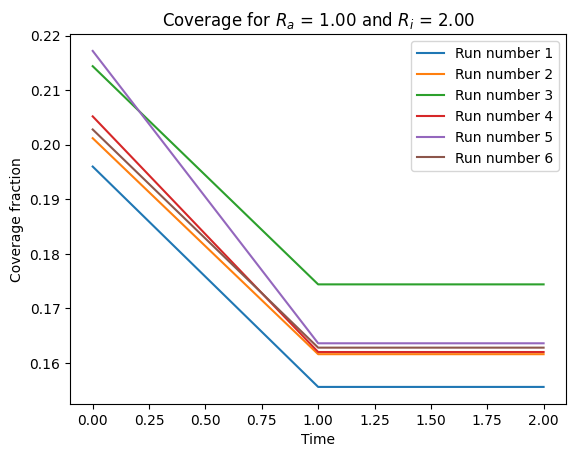

Trying for $R_a$ = 2.00 and $R_i$ = 2.00


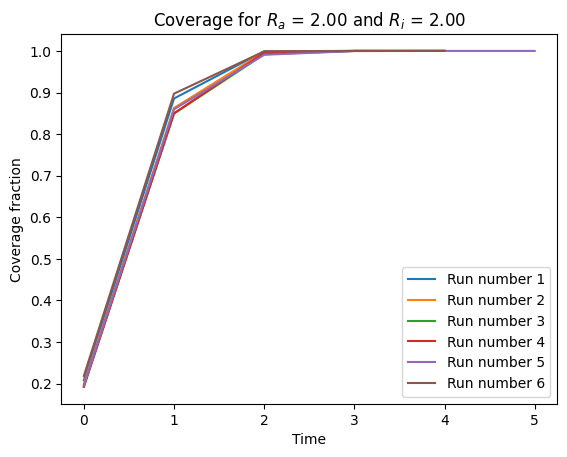

Trying for $R_a$ = 3.00 and $R_i$ = 2.00


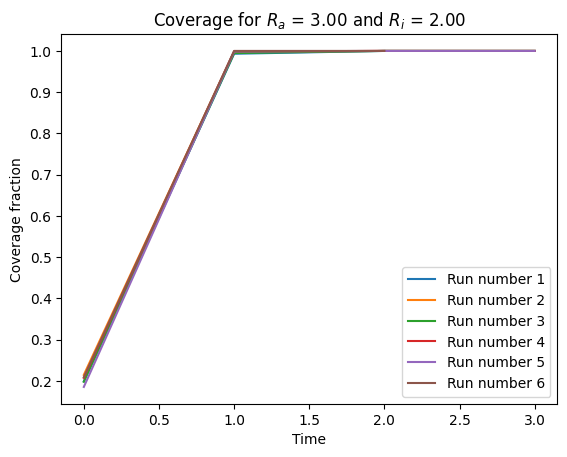

Trying for $R_a$ = 4.00 and $R_i$ = 2.00


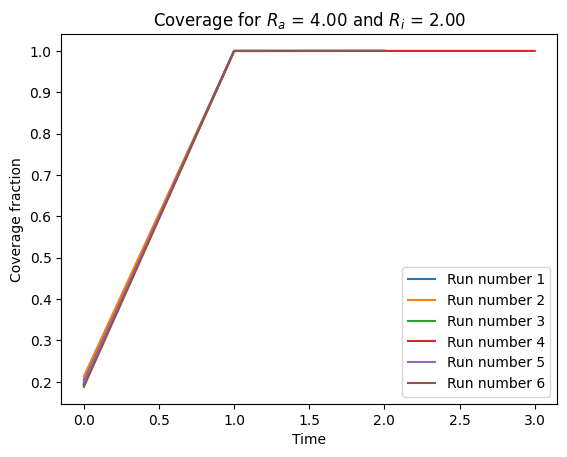

Trying for $R_a$ = 5.00 and $R_i$ = 2.00


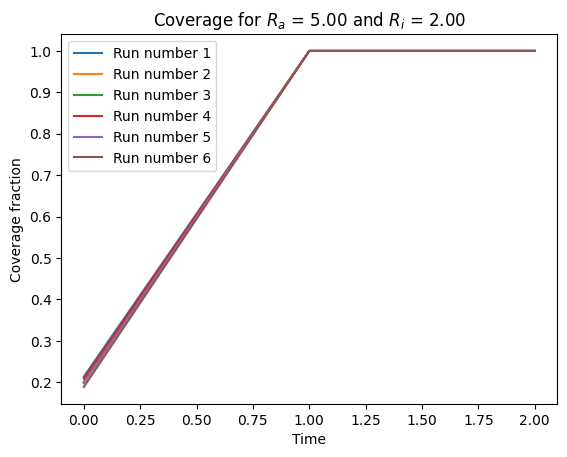

Trying for $R_a$ = 6.00 and $R_i$ = 2.00


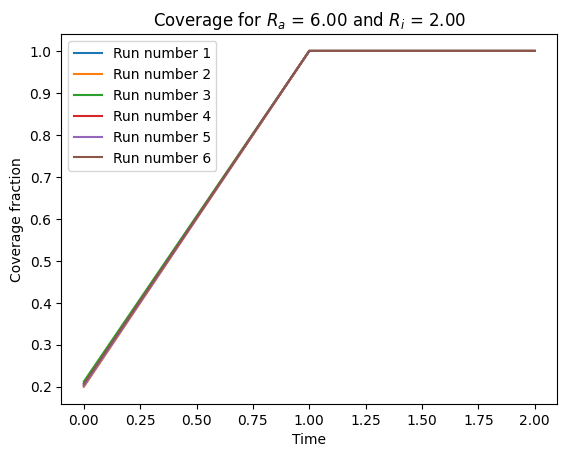

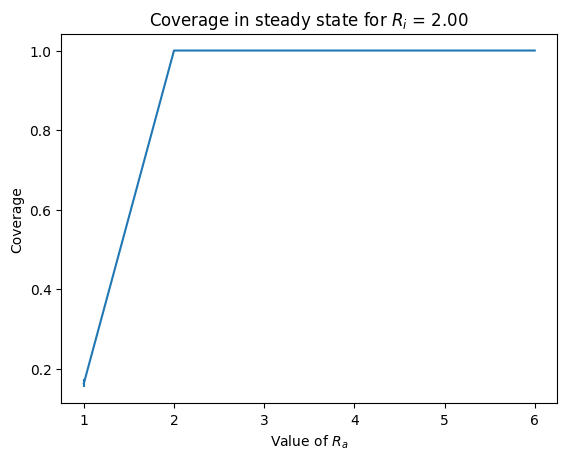

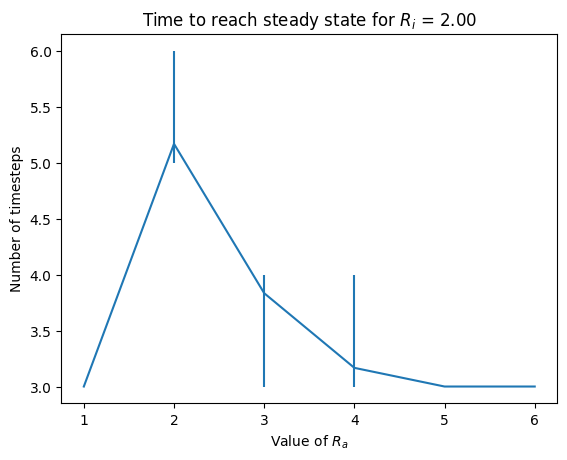

Trying for $R_a$ = 1.00 and $R_i$ = 6.00


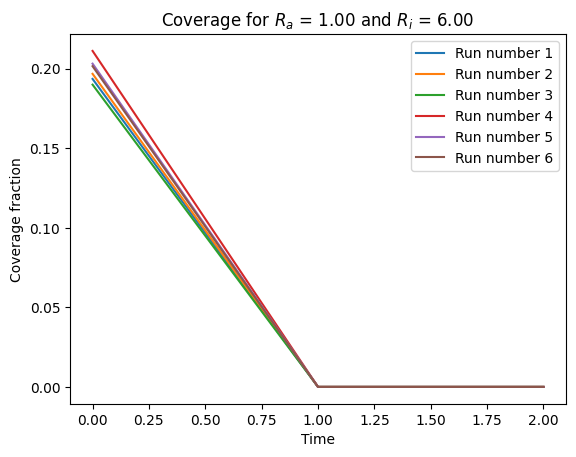

Trying for $R_a$ = 2.00 and $R_i$ = 6.00


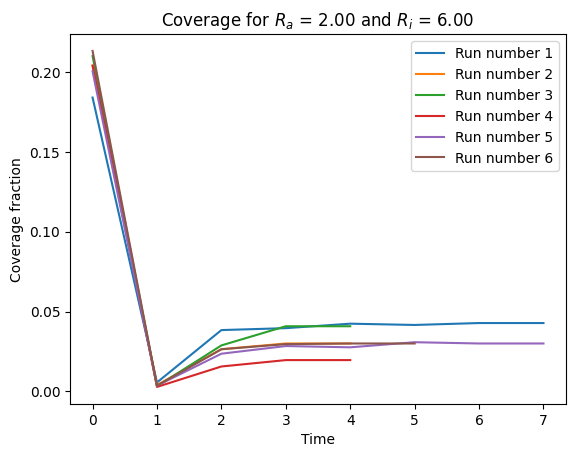

Trying for $R_a$ = 3.00 and $R_i$ = 6.00


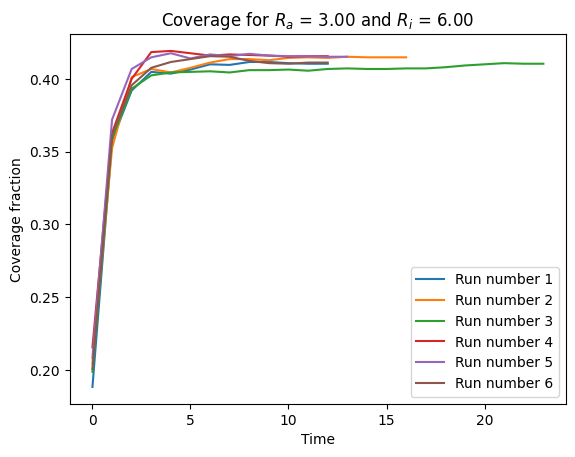

Trying for $R_a$ = 4.00 and $R_i$ = 6.00


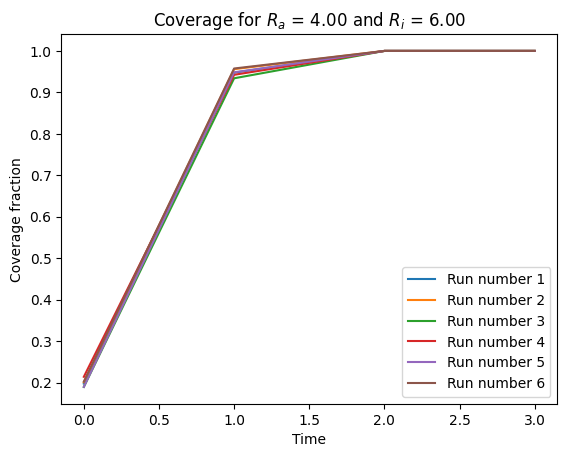

Trying for $R_a$ = 5.00 and $R_i$ = 6.00


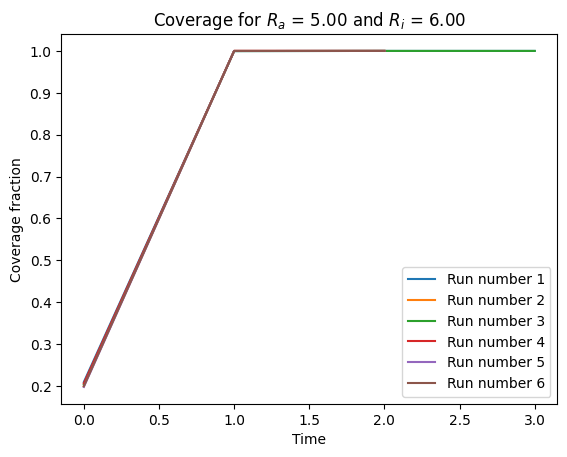

Trying for $R_a$ = 6.00 and $R_i$ = 6.00


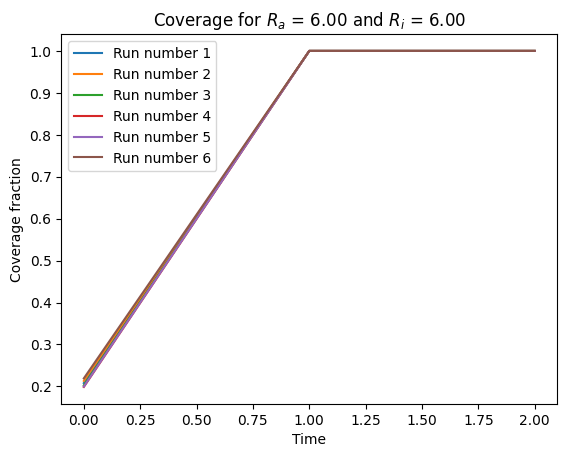

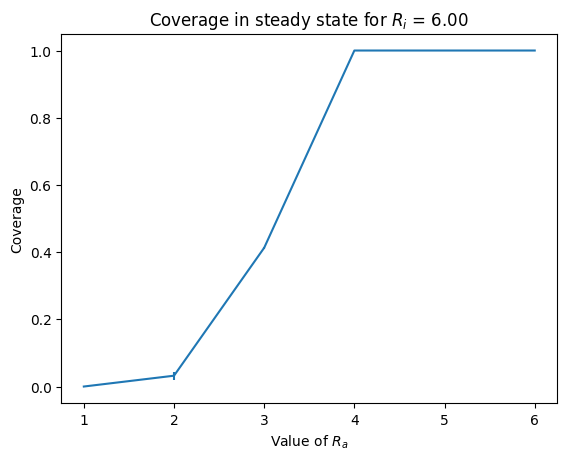

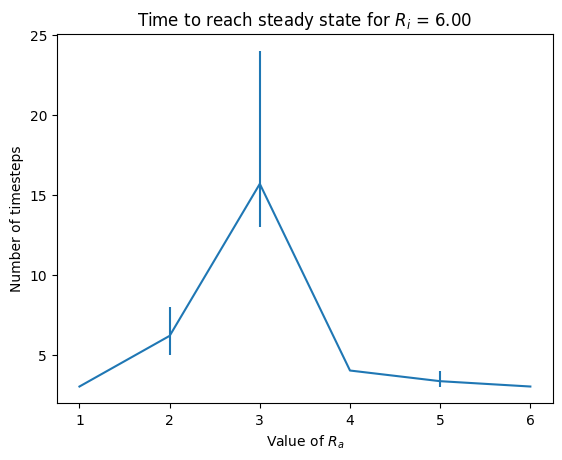

Trying for $R_a$ = 1.00 and $R_i$ = 10.00


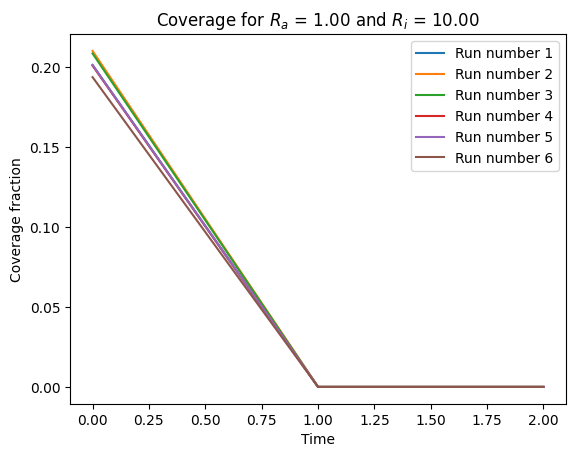

Trying for $R_a$ = 2.00 and $R_i$ = 10.00


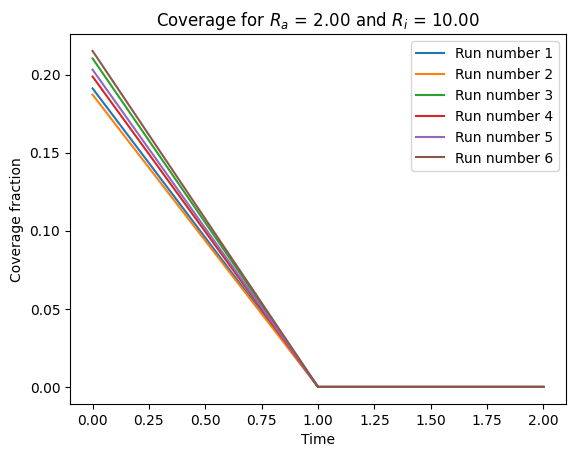

Trying for $R_a$ = 3.00 and $R_i$ = 10.00


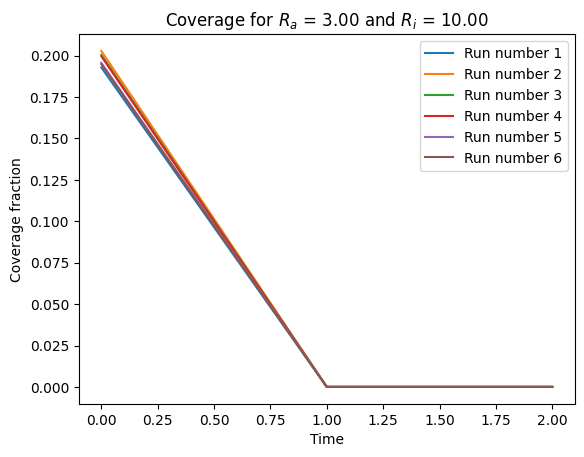

Trying for $R_a$ = 4.00 and $R_i$ = 10.00


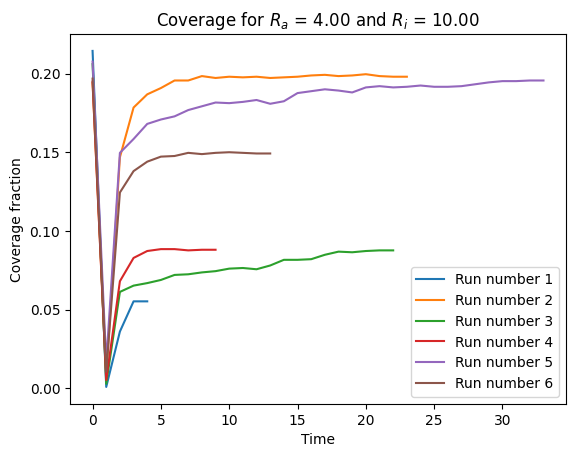

Trying for $R_a$ = 5.00 and $R_i$ = 10.00


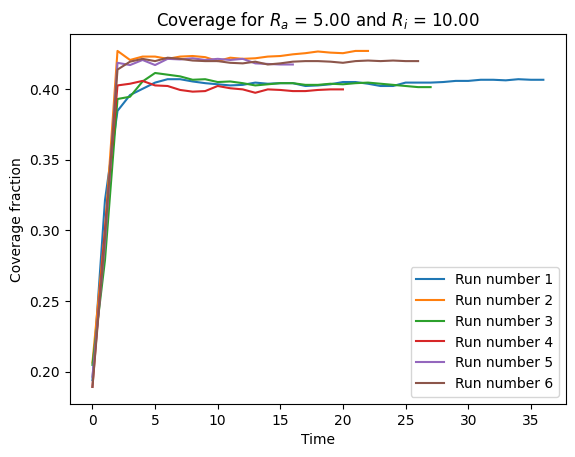

Trying for $R_a$ = 6.00 and $R_i$ = 10.00


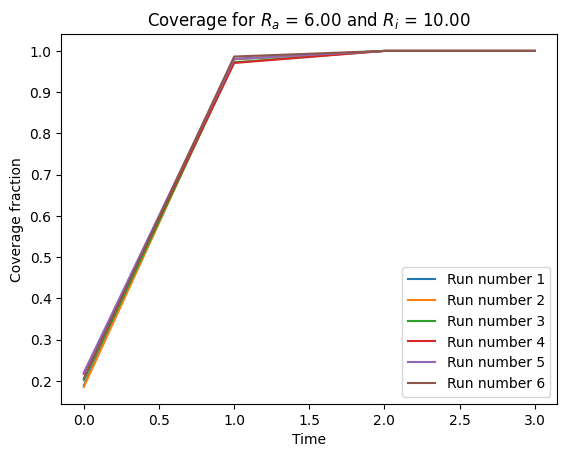

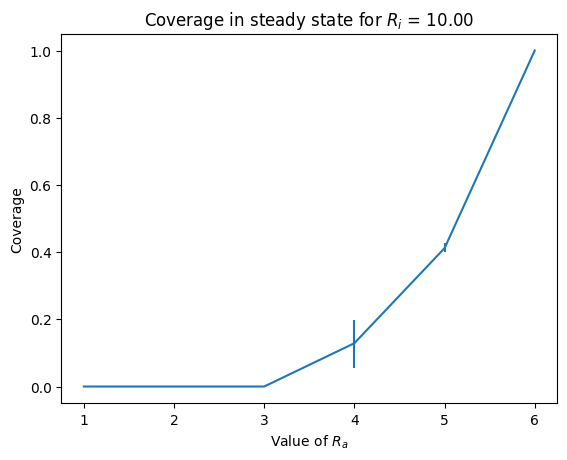

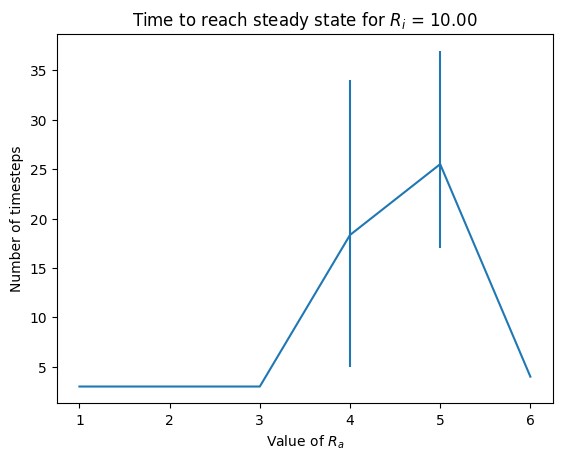

In [13]:
for Ri in RiRi:
    convergenceTime = []
    convergenceMinTime = []
    convergenceMaxTime = []

    coverageFinal = []
    coverageFinalMin = []
    coverageFinalMax = []

    for Ra in RaRa:
        
        print(f"Trying for $R_a$ = {Ra:.2f} and $R_i$ = {Ri:.2f}")
        plt.title(f"Coverage for $R_a$ = {Ra:.2f} and $R_i$ = {Ri:.2f}")
        par.R_a = Ra
        par.R_i = Ri

        convergenceTimeThis = np.zeros(samples)
        coverageThis = np.zeros(samples)
        for i in range(samples):
            Atotal = CA_simulator(par, CA_evolution, stop_steady=True)

            cTime = len(Atotal)
            convergenceTimeThis[i] = cTime

            coverage = np.array([np.sum(Ai) / (par.M * par.N) for Ai in Atotal])
            coverageThis[i] = coverage[-1]

            if i==0:
                makeVideo(Atotal, 1, len(Atotal), name=f"03-Initial-Conditions-Ra={Ra:.2f}-Ri={Ri:.2f}")

            plt.plot(coverage, label=f"Run number {i+1}")
        
        plt.xlabel("Time")
        plt.ylabel("Coverage fraction")
        plt.legend()
        plt.show()

        convergenceTime += [np.average(convergenceTimeThis)]
        convergenceMinTime += [convergenceTime[-1] - np.min(convergenceTimeThis)]
        convergenceMaxTime += [np.max(convergenceTimeThis) - convergenceTime[-1]]
        
        coverageFinal += [np.average(coverageThis)]
        coverageFinalMin += [coverageFinal[-1] - np.min(coverageThis)]
        coverageFinalMax += [np.max(coverageThis) - coverageFinal[-1]]


    print("")
    plt.errorbar(RaRa, coverageFinal, yerr=[coverageFinalMin, coverageFinalMax])
    plt.title(f"Coverage in steady state for $R_i$ = {Ri:.2f}")
    plt.xlabel("Value of $R_a$")
    plt.ylabel("Coverage")
    plt.show()

    print("")
    plt.errorbar(RaRa, convergenceTime, yerr=[convergenceMinTime, convergenceMaxTime])
    plt.title(f"Time to reach steady state for $R_i$ = {Ri:.2f}")
    plt.xlabel("Value of $R_a$")
    plt.ylabel("Number of timesteps")
    plt.show()